<a href="https://colab.research.google.com/github/unpackAI/Ai101/blob/main/Week_3_Recommeder_Systems/03_Recommender_Coursebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💻Welcome to Week 3 of the DL101 Bootcamp.

## A Dive Into Recommender Systems

Recommender Systems are one of the Machine Learning Applications that have received the most spolight in the past few years, starting with TikTok with their Short-video Recommendation System to Amazon with their Product Recommendation System.

Many great e-commerce companies could scale to multibillion companies because of their unique recommendation systems built-in to the core of their products.

This week, we will dive further into how recommender systems work, and how they can be built!

##📕 Learning Objectives
* Learn about the different types of Recommender Systems
* Understand the potential and limitations of collaborative filtering.
* Dive into the world of latent factors and embeddings.


## 📅 Weekly Progress

|Week | Content | Learning Objectives|
|:--- |:--- | :--- |
|0 | Warm Up & Theory | Get to know more about your classmates, the mentors, and learn about the fundamental concepts of Machine Learning, how it works, its limitations, and potential.
|1 |Computer Vision | Dive into Computer Vision, and learn about how machines are able to derive insights and make predictions from visual data. Build your own computer vision application, by gathering your own images and train your own model.
|2 |Tabular Data | Comprehend how AI & Machine Learning can be applied to Tabular Data such as sales, marketing, or customer data, and learn how to deduce actionable insights for the future, and build your own classification or regression application.
|**3** |**Recommender Systems** | **Learn more about Recommender Systems, and understand how TikTok, Youtube, and Netflix are able to recommend your next favorite piece of content. Choose a dataset to build your own model to predict and recommend.**
|4 | Natural Language Processing (NLP) | Apply AI & Machine Learning to text, discover Language Models and go through the process of how an AI model is able to generate, summarize and classify text. Build your own NLP application to automatically generate movie reviews, or analyze sentiment.
|5 | Practical AI for you & Graduation | Jump into a 1:1 mentorship session with our AI experts to define an AI project that solves a pain point in your organization, personal project, or life in general. Research, gather feedback, write an article and pitch your project to the class. Successfully graduate from the Bootcamp and receive your AI certification.

## Libraries and Dependencies needed for Recommender Systems

We are going import lots libraries and dependies among which few should look quite familiar:

In [2]:
!pip install -Uqq fastbook
!pip install -Uqq unpackai
!pip install -Uqq folium==0.2.1

Few lines of code below are needed to deal with collaborative filtering

In [1]:
from fastbook import *
from fastai.collab import *
from fastai.tabular.all import *

# Introduction to Recommender Systems

Recommender Systems are a subclass of *information filtering systems* that seeks to predict the "rating" or "preference" a user would give to an item. With that, they are able to predict the next relevant item to the users of a certain product. Of thousands or millions of options, they *filter* and find the most relevant.

In order to achieve that goal, there are three methods that have proven the best results.

1. **Content-based filtering:** Content-based methods for recommender systems are methods that are based on the available “features” of an item (i.e. Movie A: main actor, release date, genre etc.) or user (i.e. age, gender, occupation etc.), explain the observed user-item interactions, and predict other possible matches. The reason this method is called content-based is because we need to understand the "content" of the item or user through the features.
2. **Collaborative filtering:** Collaborative filtering methods for recommender systems are methods that are based solely on the past interactions recorded between users and items in order to produce new recommendations. Oppositely to the first approach, the actual content and features are unimportant.
3. **Hybrid approach:** The hybrid approach combines elements of both the content-based filtering and the collaborative filtering approach to make up for the limitations of either method.

<img src="https://github.com/unpackAI/DL101/raw/main/images/rec_RSoverview.png" alt="styletransfer" width="700"/>

In this section, we will be further introducing all three approaches, using the example of a movie recommendation system that provides recommendations on what movie the user should watch based on previous data.


## Content-based Filtering

The idea of building a content-based filtering recommendation system is very similar to what we have learned when we focussed on tabular data. Based on our user-item interactions (i.e. what users watched what movies), our user profiles (i.e. age, gender, occupation) and movie profiles (i.e. release date, genre, length etc.) the recommendation problem is casted into either a classification problem (predict if a user “likes” or not a movie) or into a regression problem (predict the rating given by a user to a movie).

We will be able to identify important features of specific movies, that are important to a certain group of people (e.g. young women tend to watch horror movies OR young men tend to watch action movies).

<br>

We can take a **user-centered approach**, which considers the features of the item to answer the question of:
> *What is the probability for this user to like each movie?* (Classification Problem)

> *What is the ranking given by this user to each movie?* (Regression Problem)

This implies that whenever there is a new user, we can predict what movies he will or will not want to watch and how he would rate them.

<br>

We can also take an **item-centered approach**, which considers the features of the user to answer the question of: 

> *What is the probability for each user to like this item?* (Classification Problem)

>*What is the ranking given by each user to this item?* (Regression Problem)

This implies that whenever there is a new movie, we can predict what users would want to watch it and how they would possibly rate it.

<br>

Both approaches are illustrated below with the example of a classification problem, with an example dataset. Keep in mind that either approach has its trade-off.



<img src="https://github.com/unpackAI/DL101/raw/main/images/rec_user_item.png" alt="styletransfer" width="700"/>

From a practical point of view, we should underline that most of the time it is much more difficult to gather information of a user (users do not want to answer too much questions) than to retrieve information about a new movie (people adding them have an interest in filling these information in order to make their items recommended to the right users).

Moreover, you should keep in mind that new users or movies with previously unseen features will logically suffer from content-filtering approach, but once the system is robust enough, this has few to no chance to happen.

Thus far, it should have become clear that the content-filtering method heavily relies on its features (like any tabular data problem). Moreover, a lot of data pre-processing has to be done to make it work such as  removing missing data etc.

The following method does NOT heavily depend on defined features and is totally fine with having missing values. How that works, we will explain in the following.

## Collaborative Filtering

When approaching the same Recommender System problem with a collaborative filtering approach, the idea is a lot more simple. Instead of defining features accross users or features, we simply look at what movies the current user has watched or rated well, find other users that have watched or liked the same movies, and then recommend new movies the other users have watched or liked to the current user. Because it is solely based on the past interactions recorded between users and items (i.e. movies) in order to produce new recommendations, we essentially construct a network of all users and movies and can cluster and correctly assume the user's preferences based on their similarity to other users.

For example, on Netflix you may have watched lots of movies that are science fiction, full of action, and were made in the 1970s. Netflix may not know these particular features of the films you have watched, but it will be able to see that other people that have watched the same movies that you watched also tended to watch other movies that are science fiction, full of action, and were made in the 1970s. In other words, to use this approach we don't necessarily need to know anything about the movies, except who like to watch them.

The main advantage of collaborative approaches is that they require no information about users or items and, so, they can be used in many situations. Moreover, the more users interact with items the more new recommendations become accurate: for a fixed set of users and items, new interactions recorded over time bring new information and make the system more and more effective.

<img src="https://github.com/unpackAI/DL101/raw/main/images/rec_netflixrecommender.png" alt="styletransfer" width="700"/>

However, as it only consider past interactions to make recommendations, collaborative filtering suffer from the **“cold start problem”**: it is impossible to recommend anything to new users or to recommend a new item to any users and many users or items have too few interactions to be efficiently handled. This drawback can be addressed in different ways:
* recommending random items to new users or new items to random users (random strategy)
* recommending popular items to new users or new items to most active users (maximum expectation strategy)
* recommending a set of various items to new users or a new item to a set of various users (exploratory strategy)

## Hybrid approach

The hybrid approach combines the collaborative filtering and content-based approach to achieve state-of-the-art results. Thus, they are the type of large scale recommender systems that you will encounter nowadays. This kind of hybrid approach can mainly take two forms: we can either train two models independently (one collaborative filtering model and one content based model) and combine their suggestions or directly build a single model (often a neural network) that unify both approaches by using as inputs prior information (about user and/or item) as well as “collaborative” interactions information.

This week, we will build a movie recommendations system using the collaborative filtering approach and lead you through the key aspects and concepts.

## Collaborative Filtering Workflow

Let's discuss how to we could possibly build the Recommender Systems through iterating over Machine Learning Workflow, which is our golden approach to developing machine learning applications.

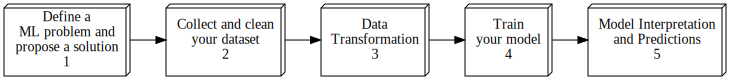

In [6]:
#@title ML Workflow
gv('''ordering=in
problem[shape=box3d width=1 height=1 label="Define a \n ML problem and \n propose a solution\n1"]
dataset[shape=box3d width=1 height=1 label="Collect and clean \n your dataset\n2"]
transform[shape=box3d width=1 height=1 label="Data\n Transformation\n3"]
train[shape=box3d width=1 height=1 label="Train \n your model\n4"]
predict[shape=box3d width=1 height=1 label="Model Interpretation \n and Predictions\n5"]
problem->dataset->transform->train->predict''')

1. ***Define a ML problem and propose a solution:*** Define what Recommender System Problem you intend to work on. What are your items and who are yours users? Define if you take the content-based approach or the collaborative filtering approach and start defining your proposed model for a solution.

2. ***Collect and construct your dataset:*** Prepare your data-item interaction matrix.


3. ***Data Transformation:*** Build your dataloaders.


4. ***Train your model:*** Start the training, define `y_range`, `n_factors` and your performance `metrics`.

5. ***Interpret the model and make predictions:*** Dive into the results to understand the defined latent factors and embeddings. Use the model to make predictions.

# Building a Collaborative Filtering Model

## 1. Define a Machine Learning problem and propose a solution

## 2. Constructing the dataset

We do not have access to Netflix's entire dataset of movie watching history, but there is a great dataset that we can use, called [MovieLens](https://grouplens.org/datasets/movielens/). This dataset contains tens of millions of movie rankings (a combination of a movie ID, a user ID, and a numeric rating), although we will just use a subset of 100,000 of them for our example. If you're interested, it would be a great learning project to try and replicate this approach on the full 25-million recommendation dataset, which you can get from their website.

The dataset is available through the usual fastai function:

In [7]:
path = untar_data(URLs.ML_100k)

In [8]:
path.ls()

(#23) [Path('/root/.fastai/data/ml-100k/allbut.pl'),Path('/root/.fastai/data/ml-100k/u3.test'),Path('/root/.fastai/data/ml-100k/u3.base'),Path('/root/.fastai/data/ml-100k/u1.test'),Path('/root/.fastai/data/ml-100k/u.user'),Path('/root/.fastai/data/ml-100k/u2.base'),Path('/root/.fastai/data/ml-100k/u4.test'),Path('/root/.fastai/data/ml-100k/u.occupation'),Path('/root/.fastai/data/ml-100k/u4.base'),Path('/root/.fastai/data/ml-100k/u.genre')...]

In order to better understand our dataset, let's observe the README file which is an introductionary file to our data. 

Note that not every dataset supplies a README file.

In [9]:
readme = path / 'README'
print(readme.read_text()) # "<path variable>.read_text()" will get the content of a file

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

After going through the brief description of the data, we can see that among others we can access:
* `u.data` (information about the movie ratings of users),
* `u.item` (information about the items (movies)),
* `u.genre` (list of genres),
* `u.user` (demographic information about the users) and
* `u.occupation` (list of occupations).

Moreover, you could have noticed that we are working with a tab seperated list. This simply implies that we are using tab as a delimiter/seperator of our data instead of commas (CSV - comma seperated values).

Let's explore our data. Since we are working with a tab seperated list, we will have to define the `delimiter` as a "`|`" (tab), and use the `latin-1` encoding to maps all possible byte values to the first 256 Unicode code points (English characters). Lastly, we can define that the table does not have any header, so that we automatically create headers for the table from 0 to 23.

Let's start with observing `u.item`:

In [10]:
pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1', header = None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+(1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(1998),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Crazy%20(1994),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


As we can see we have 1681 rows corresponding to 1681 movies with 24 columns. You can go through the readme file if you want to understand the meaning of each column.

The table looks messy. Let's make it more easier for us to view. For that we will get rid of the 19 possible genre binary fields, add headers and name each column.

In [11]:
movies = pd.read_csv(
    path/'u.item',  delimiter='|', encoding='latin-1', #this simply ensures that we can open and read the file.
    usecols=(0,1,2,3,4), names=('movie','title', 'release date', 'video release date', 'IMDb URL'))  #this makes sure it only contains the columns we want.

movies.head() #This shows us the "head"(i.e. first 5 rows) of the table.

,movie,title,release date,video release date,IMDb URL
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(1995)
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Let's do the same for `u.user`.

In [12]:
users = pd.read_csv(
    path/'u.user', delimiter='|', encoding='latin-1', #this simply ensures that we can open and read the file.
    usecols=(0,1,2,3,4), names=('user id', 'age', 'gender', 'occupation', 'zip code')) #this makes sure it only contains the columns we want.

users.head() #This shows us the "head"(i.e. first 5 rows) of the table.

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


And lastly for `u.data`, which contain our ratings.

In [13]:
ratings = pd.read_csv(path/'u.data', delimiter='\t',  #this simply ensures that we can open and read the file.
                      usecols=(0,1,2), names=['user','movie','rating']) #this makes sure it only contains the columns we want.
ratings.head() #This shows us the "head"(i.e. first 5 rows) of the table.

,user,movie,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


You might have already realized, but...

**as we are working on a collaborative filtering model, all user or movie related information are not important as we solely rely on the recorded interactions between users and movies. Thus, we required only the `u.data` file.**

The only adjustment, we will make is to add the movie titles into the now defined `ratings` table, so that make it a little bit easier for us humans to understand what we are looking at.

In [14]:
ratings = ratings.merge(movies[["movie", "title"]]) # this line adds the "title" column to our table
ratings.head() #This shows us the "head"(i.e. first 5 rows) of the table.

,user,movie,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


We can also visualize this as something we call a *user-item interaction matrix*. It list all the movie IDs on the top and all the user IDs on the left. This way we can see the rating from user 1 to 14 for movie 1 to 14. You can play around with the `iloc` to show more results.

For example, user 1 gave a 5.0 rating to movie 9. Any field that shows NaN means that the user has not yet rated the movie. In a content-based approach this would be an issue, however using the collaborative filtering method, it cannot work if you get rid of NaNs (Not a Number). In fact, the goal of the collaborative filtering model is to be able to fill and predict such ratings.

In [15]:
print(ratings.pivot(index='movie', columns='user', values='rating').iloc[:15,:15])

user    1    2   3    4    5    6    7    8    9    10   11   12   13   14  \
movie                                                                        
1      5.0  4.0 NaN  NaN  4.0  4.0  NaN  NaN  NaN  4.0  NaN  NaN  3.0  NaN   
2      3.0  NaN NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN   
3      4.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4      3.0  NaN NaN  NaN  NaN  NaN  5.0  NaN  NaN  4.0  NaN  5.0  5.0  NaN   
5      3.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN   
6      5.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN   
7      4.0  NaN NaN  NaN  NaN  2.0  5.0  3.0  4.0  4.0  NaN  NaN  2.0  5.0   
8      1.0  NaN NaN  NaN  NaN  4.0  5.0  NaN  NaN  NaN  4.0  NaN  4.0  NaN   
9      5.0  NaN NaN  NaN  NaN  4.0  5.0  NaN  NaN  4.0  5.0  NaN  3.0  4.0   
10     3.0  2.0 NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
11     2.0  NaN NaN  4.0  NaN  NaN  3.0  3.0  NaN  4.0  2.0  NaN

⚡ Try to the understand the *user-item interaction matrix* above as it will become more important later on.

## 3. Data Transformation

We can then build a `DataLoaders` object from our `rating` table above. By default, it takes the first column for the user, the second column for the item (here our movies), and the third column for the ratings. We need to change the value of `item_name` in our case to use the titles instead of the IDs:

In [16]:
dls = CollabDataLoaders.from_df(ratings, user_name='user', item_name='title')

Let's have a look at the final input ahead of the model training using `show_batch` on our dataloaders`dls`.

In [17]:
dls.show_batch()

,user,title,rating
0,542,My Left Foot (1989),4
1,422,Event Horizon (1997),3
2,311,"African Queen, The (1951)",4
3,595,Face/Off (1997),4
4,617,Evil Dead II (1987),1
5,158,Jurassic Park (1993),5
6,836,Chasing Amy (1997),3
7,474,Emma (1996),3
8,466,Jackie Chan's First Strike (1996),3
9,554,Scream (1996),3


That looks great! Again, from all the information we were able to observe above, we simply need the user-item interaction data and the corresponding rating.

Let's train our model.

## 4. Model Training

Let's start building our learner using the `collab_learner` function.

As usual, it takes our dataloaders as an argument. In addition, we also define `n_factors`, `y_range` and `metrics`. These are all very critical for us.

> `y_range`: Our y is the dependant variable that our model has to learn to predict. In our case it's the rating each user gives to a movie. Ahead of the training, we will have to define the range which in our case is from 0 - 5 (0 star ranking = bad movie, 5 star ranking = good movie). It has proven as beneficial to have a slightly higher maximum or minimum. In order to find out the rating range, we will simply find the minimum and maximum rating inside the `ratings` table. Feel free to play around with that.

In [18]:
range_rating = (min(ratings["rating"]), max(ratings["rating"]))
range_rating

(1, 5)

Now that we know its between 0 and 5 we can set the `y_range`.

> `n_factors`: Here we are defining the amount of latent factors. The foundational idea of latent factors in collaborative filtering will be further explained later. Don't jump ahead yet!

> `metrics`: We have chosen the Root Mean Squared Error (RMSE) as a performance as its easiest to directly interpret. It essentially tells us how close our predictions are to the actual data points. The higher the value, the further our predictions deviate from the actual rating. RMSE ranges from 0 to ∞. As a rule of thumb, a RMSE value below 1 is pretty good.

In [19]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5), metrics=rmse)

Let's beging training our model using 5 epochs.

In [20]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,_rmse,time
0,1.294888,1.238758,1.112995,00:10
1,0.919833,0.922176,0.960300,00:18
2,0.864378,0.886033,0.941293,00:17
3,0.810605,0.872626,0.934144,00:11
4,0.759917,0.871024,0.933286,00:14


As a benchmark for the same dataset we can compare ourselves to the popular [Librec system](https://guoguibing.github.io/librec/index.html) for collaborative filtering. They show the best results of a RMSE of 0.91. So we are doing pretty well.

## 5. Model Interpretation

### How did the model learn to "recommend"?

After having trained our own collaborative filtering model, only depending on user-item interactions and the corresponding ranking, the obvious question is now: "How did the model train itself?".

Prepare yourself to dive into the world of latent factors and embeddings, which are not only crucial in collaborative filtering, but also in other applications such as NLP (Natural Language Processing).

Let's start with going through the example of a movie recommender system.

#### Introduction into Latent Factors

In the case above, we are now able to pretty confidently predict, what kind of movies you enjoy based on your  and other users previous watch history. Let's now try to understand how this is possible.

Let's say we want to use our newly developed model on Netflix. On Netflix, you may have watched lots of movies that are science fiction, full of action, and were made in the 1970s. Netflix may not know these particular properties of the films you have watched, but it will be able to see that other people that have watched the same movies that you watched also tended to watch other movies that are science fiction, full of action, and were made in the 1970s. In other words, our model does not need to necessarily need to know anything about the movies, except who like to watch them.

The key foundational idea to that is that of *latent factors*. In the Netflix example, we started with the assumption that you like old, action-packed sci-fi movies. But you never actually told Netflix that you like these kinds of movies. And Netflix never actually needed to add columns to its movies table saying which movies are of these types. Still, there must be some underlying pattern why a person prefers one set of movies over another. It is the models job, to identify and find this assumed pattern that allows it to make good predictions.

In other words, the "features" that define the movies and the preference of the user, are not defined such as *release year*, *genre* or *length* (like we have seen in the content-based approach or any other tabular data problem), but these features are learned by the model. Thus, they are less transparent and obvious to humans.

##### How are the optimal latent factors learned?

In order to find the pattern between users and their interaction with items and the corresponding ranking. We essentially create a self-defined amount of "features" (called ***latent factors***) for the users and the movies that after training can explain the patterns. 

The goal of the model is to update and optimise the value of the latent factors towards being able to correctly predict the rating of the users based on the watch history of all users. To simplify this, you can imagine as a regression problem where we intend to correctly calculate the latent factor values (independent variable) based on the value of the rating (dependant variable).

> The more latent factors we have, the more in detailed patterns we can find. However, it will also become more and more abstract.

The latent factors are learned both for each movie as well as for each user. The latent factors of a movie describe its genre, content, or other characteristics. The latent factors of a user describe what kind of features the user likes in a movie. Matching the learned features together with the learned movie preferences of a user allow us to calculate and predict the rating.

#### Introduction into embeddings

Having trained the model to a point so that the latent factors hold actual significance, we have reached a point where we can see powerful relationships between movies that, we would normally never be able to quantify.

This is when we can start working with ***embeddings***. Embeddings are a learned representation for a given dataset where items (i.e. movies) that share a similarity in content and categories have a similar representation.

In the picture below you see a visualization that simplifies what embeddings are.

<img src="https://github.com/unpackAI/DL101/raw/main/images/rec_movieembedding.png" alt="styletransfer" width="700"/>

You can see on the left that we have 4 movies that are explained by 7 latent factors. For movies, latent factors could represent the genre or age, but also possibly the actual content such as violence-level or contained nudity.

Be reminded that again, that we simplified the latent factors to make them more intuitive for humans. In this case again, the value of the latent factors range between -1 and 1. The higher the number the more the latent factor represents the movie.

The entire vector or row is called an embedding and is the learned representation of how the movie can be compared to other movies.

By reducing dimensions from 7D to 2D we can more clearly see the significance of that. We can now visually interpret the similarity of Movie 1 and 2 which also share similar values in their latent factors. Movie 1 and 4 on the other hand seem extremely different.

Let's apply our acquired expertise to our own dataset.

### Latent factors and embeddings for our Movie Recommender System

In order to analyze the results of our previous model, we will work with the 1000 most rated movies for this. You will see that older movies have received more ratings than newer movies.

In [21]:
#@title Top 100 most rated movies
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:100]
top_movies

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)', 'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)', 'Raiders of the Lost Ark (1981)', 'Godfather, The (1972)', 'Pulp Fiction (1994)', 'Twelve Monkeys (1995)',
       'Silence of the Lambs, The (1991)', 'Jerry Maguire (1996)', 'Chasing Amy (1997)', 'Rock, The (1996)', 'Empire Strikes Back, The (1980)', 'Star Trek: First Contact (1996)', 'Titanic (1997)',
       'Back to the Future (1985)', 'Mission: Impossible (1996)', 'Fugitive, The (1993)', 'Indiana Jones and the Last Crusade (1989)', 'Willy Wonka and the Chocolate Factory (1971)',
       'Princess Bride, The (1987)', 'Forrest Gump (1994)', 'Saint, The (1997)', 'Monty Python and the Holy Grail (1974)', 'Full Monty, The (1997)', 'Men in Black (1997)', 'Terminator, The (1984)',
       'E.T. the Extra-Terrestrial (1982)', 'Dead Man Walking (1995)', 'L

Let's observe our data. Using `w.shape`, we can observe the shape of our model output. As you can see below our output contains 1000 rows of data and 50 columns.

The 1000 rows correspond to the 1000 most rated movies while the 50 columns correspond to 50 latent factors that we have set during in our `Learner` using `n_factors=50`. Note that after model training, these latent factors actually hold significance.

In [25]:
movie_w = learn.model.weight(top_movies)
movie_w.shape

torch.Size([100, 50])

Working with 50 latent factors and therefore 50 dimensions makes it very difficult for us to interpret the latent factors and embeddings. Let's reduce the number of dimensions down from 50D to 2D just like it was visualised in the image above, when we discussed embeddings.

Now we only have 2 columns, while still have 1000 rows (most rated movies).

In [26]:
#@title Dimensionality Reduction
movie_pca = movie_w.pca(2)
fac0,fac1 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]
movie_pca.shape

torch.Size([100, 2])

Let's list the top 10 movies with the highest score on the first dimension.

For someone who has watched all movies, we can confidently assume that we will see a strong similarity between all 10 movies in one given category.

In [29]:
#@title Top 10 with the highest score on the first dimension.
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9400), 'Volcano (1997)'),
 (tensor(0.8483), "Dante's Peak (1997)"),
 (tensor(0.7972), 'Liar Liar (1997)'),
 (tensor(0.7941), 'Murder at 1600 (1997)'),
 (tensor(0.7882), 'Independence Day (ID4) (1996)'),
 (tensor(0.7693), 'Twister (1996)'),
 (tensor(0.7496), 'Saint, The (1997)'),
 (tensor(0.6430), 'Broken Arrow (1996)'),
 (tensor(0.6172), 'Mission: Impossible (1996)'),
 (tensor(0.5863), "Devil's Own, The (1997)")]

And now the bottom 10 with the lowest score for the first dimension.

For someone who has watched all movies, we can also confidently assume that the movies below share a strong similarity in a given category.


### More about Embeddings
<hr>


Since we think qualitatively, and embeddings are quantitative, We cannot really know what information the embeddings hold. Unlike with everyday tabular data, where we are used to seeing information grouped column by column, embeddings are mathematical representations at heart.

As a result, the infromation that embeddings hold, can be spread across mutliple dimensions rather than being condensed into one. But, that doesn't stop us from trying to glean meaning from them. We can do this by examining the extremes of the embeddings. 

Moreover, we can say, that the 10 movies below, are opposite to the movies above on the first dimension. 

Have you seen any of these movies before? Can you think of any
reasons that they would be grouped on the extreme end of one factor in the embedding space? 

In [30]:
#@title Top 10 with the lowest score on the first dimension.
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.8600), 'Casablanca (1942)'),
 (tensor(-0.8368), 'Godfather, The (1972)'),
 (tensor(-0.7146), "Schindler's List (1993)"),
 (tensor(-0.6729), 'Usual Suspects, The (1995)'),
 (tensor(-0.6691), 'Fargo (1996)'),
 (tensor(-0.6672), "One Flew Over the Cuckoo's Nest (1975)"),
 (tensor(-0.6138), 'To Kill a Mockingbird (1962)'),
 (tensor(-0.6095), 'Pulp Fiction (1994)'),
 (tensor(-0.5933), 'Shawshank Redemption, The (1994)'),
 (tensor(-0.5586), 'Psycho (1960)')]

Let's do the same for our second dimension:

In [31]:
#@title Top 10 with the highest score on the second dimension.
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.6783), 'Leaving Las Vegas (1995)'),
 (tensor(0.5419), 'Clockwork Orange, A (1971)'),
 (tensor(0.5323), 'Trainspotting (1996)'),
 (tensor(0.5121), 'Evita (1996)'),
 (tensor(0.4901), 'Raising Arizona (1987)'),
 (tensor(0.4292), 'English Patient, The (1996)'),
 (tensor(0.4267), "Devil's Own, The (1997)"),
 (tensor(0.4115), 'Volcano (1997)'),
 (tensor(0.4064), "Dante's Peak (1997)"),
 (tensor(0.3972), 'Pulp Fiction (1994)')]

Bottom 10:

In [32]:
#@title Top 10 with the lowest score on the second dimension.
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.6570), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.5291), 'Braveheart (1995)'),
 (tensor(-0.4652), 'Shawshank Redemption, The (1994)'),
 (tensor(-0.4632), 'Back to the Future (1985)'),
 (tensor(-0.4314), 'Fugitive, The (1993)'),
 (tensor(-0.4217), 'Empire Strikes Back, The (1980)'),
 (tensor(-0.3960), 'Star Wars (1977)'),
 (tensor(-0.3893), 'Indiana Jones and the Last Crusade (1989)'),
 (tensor(-0.3889), 'Terminator 2: Judgment Day (1991)'),
 (tensor(-0.3838), 'Return of the Jedi (1983)')]

And we can even plot the movies according to their scores on those 2 dimensions. For that we randomly select a subset of 50 movies to keep it visually pleasing for us. The first dimension is presented via the x-axis, and the second dimension via the y-axis. What similarities can you see? Can you try to guess how the movies are grouped?

If you cannot find any, do not worry. This could be due to us simply reducing dimensionality down from 50 to 2. Moreover, this is also one of the limitations of Machine Learning. Humans are barely able to comprehend how the model trains and what patterns he finds: this negatively impacts the explainability of AI.

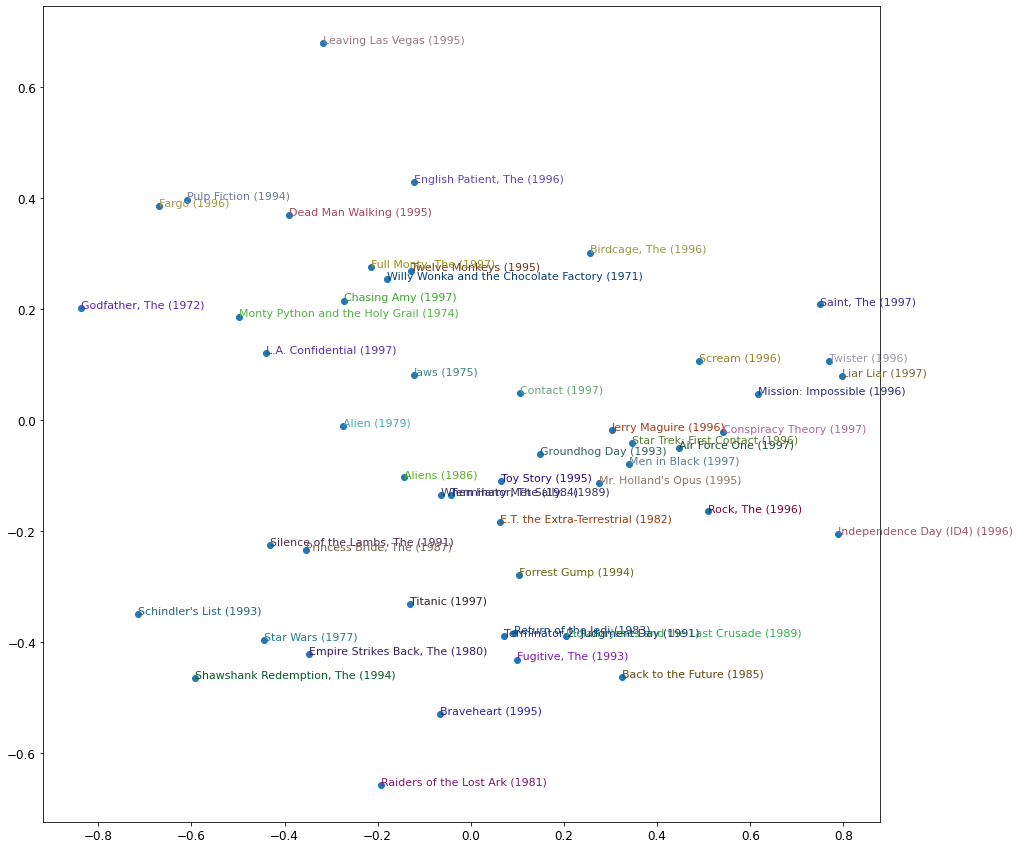

In [33]:
#@title Embedding space of a subset of 50 movies.
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

### Use the model to find similar movies to provide recommendations

Even in a 50 dimensional space like we have worked with above, we can calculate the closest neighbors of an embedding. If there were two movies that were nearly identical, then their embeddings would also have to be nearly identical, because the users that would like them would be nearly exactly the same. There is a more general idea here: movie similarity can be defined by the similarity of users that like those movies. And that directly means that the distance between two movies' embeddings can define that similarity. We can use this to find the 5 most similar movie to *Silence of the Lambs*.

This is a powerful recommendation technique. Lets try it out below. Also feel free to change the name of the target movie (i.e. *Silence of the Lambs*) to find the closest neighbor and a possible recommendation for yourself.

In [34]:
movie = 'Silence of the Lambs, The (1991)'

In [35]:
#@title Top 5 most similar movies of target movie above.
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[movie]
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1:6]
dls.classes['title'][idx]

(#5) ['Butch Cassidy and the Sundance Kid (1969)','Shawshank Redemption, The (1994)','Farewell to Arms, A (1932)','Princess Bride, The (1987)','Mr. Smith Goes to Washington (1939)']

Lets try the same for a more popular sci-fi movie such as *Star Wars (1977)*. You can see that we recommend other movies part of the Star Wars universe.

In [36]:
movie = 'Star Wars (1977)'

In [37]:
#@title Top 5 most similar movies of target movie above.
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[movie]
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1:6]
dls.classes['title'][idx]

(#5) ['Empire Strikes Back, The (1980)','Forbidden Planet (1956)','Princess Bride, The (1987)','Stand by Me (1986)','Shawshank Redemption, The (1994)']

We now build an entire collaborative filtering model, and jointly learned about latent factors and embeddings. We understood how powerful they and the relationships and patterns they can uncover.

You are well prepared to work on your own collaborative filtering model.

# Your Deliverables, your time to apply the theory in practice.

Congratulations on getting to the end of this Notebook and no worries at all if you struggled with some of the theory and did not fully understand what was taught here as your actual learning starts from here.

The ideal time of reading this, is right before the Review Session, so you have a bit of time to reflect about the learning material, identify the most confusing and hard elements of a reading, and bring them to the discussion during the Review Session with the Mentors. The Review Session is there for you to close the gap in your current understanding of the material.

For your deliverables you will have to work on a seperate Notebook.

---
*Note: this notebook has is adapted from fastai's notebook 08_collab.ipynb 
simplified to give an overview of collaborative learning.*

##### Other sources: 
* https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada
*https://towardsdatascience.com/collaborative-filtering-using-fastai-a2ec5a2a4049
*https://towardsdatascience.com/introduction-to-latent-matrix-factorization-recommender-systems-8dfc63b94875
*https://towardsdatascience.com/evaluation-metrics-for-recommender-systems-df56c6611093
*https://towardsdatascience.com/deep-latent-variable-models-unravel-hidden-structures-a5df0fd32ae2
---

